# Trying to install needed package "geopy" and "folium" if not already installed

In [1]:
conda_package_check = !conda list geopy
if 'geopy' not in str(conda_package_check[-1]):
    print('Anaconda package "geopy" is not installed yet.\n Installation will be executed now...')
    !conda install -c conda-forge geopy --yes    
else:
    print('Anaconda package "geopy" is installed.\n No further actions needed...')
    
conda_package_check = !conda list folium
if 'folium' not in str(conda_package_check[-1]):
    print('Anaconda package "folium" is not installed yet.\n Installation will be executed now...')
    !conda install -c conda-forge folium=0.5.0 --yes    
else:
    print('Anaconda package "folium" is installed.\n No further actions needed...')
    
conda_package_check = !conda list tabula-py
if 'tabula-py' not in str(conda_package_check[-1]):
    print('Anaconda package "tabula-py" is not installed yet.\n Installation will be executed now...')
    !conda install -c conda-forge tabula-py --yes    
else:
    print('Anaconda package "tabula-py" is installed.\n No further actions needed...')
    
conda_package_check = !conda list beautifulsoup4
if 'beautifulsoup4' not in str(conda_package_check[-1]):
    print('Anaconda package "beautifulsoup4" is not installed yet.\n Installation will be executed now...')
    !conda install -c conda-forge beautifulsoup4 --yes
else:
    print('Anaconda package "beautifulsoup4" is installed.\n No further actions needed...')
    
conda_package_check = !conda list lxml
if 'lxml' not in str(conda_package_check[-1]):
    print('Anaconda package "lxml" is not installed yet.\n Installation will be executed now...')
    !conda install -c conda-forge lxml --yes    
else:
    print('Anaconda package "lxml" is installed.\n No further actions needed...')

Anaconda package "geopy" is not installed yet.
 Installation will be executed now...
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 

## Load needed libraries and packages

In [2]:
import numpy as np 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize

import tabula

import json 

import requests 

from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

print('Libraries imported.')

Libraries imported.


In [3]:
muc_crime = pd.read_csv('muc_crime.csv', index_col=0)
muc_crime['Total crimes'] = muc_crime['Total major crimes'] + muc_crime['Total other crimes']
muc_crime

,Borough,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Total crimes
1,Altstadt-Lehel,8205,3,93,1115,2604,575,1346,8157,16362
2,Ludwigsvorstadt-Isarvorstadt,14091,6,212,1887,2806,688,1571,12443,26534
3,Maxvorstadt,4799,2,63,727,993,492,587,4659,9458
4,Schwabing West,2310,3,40,281,397,466,334,2305,4615
5,Au-Haidhausen,3531,2,34,406,772,429,789,3469,7000
6,Sendling,1983,2,22,274,270,325,338,1971,3954
7,Sendling-Westpark,2234,-,38,335,297,328,412,2215,4449
8,Schwanthalerhoehe,1703,2,13,275,257,244,243,1638,3341
9,Neuhausen-Nymphenburg,3913,2,51,558,712,813,553,3815,7728
10,Moosach,2796,1,32,414,613,324,568,2771,5567


In [4]:
muc_crime = pd.read_csv('muc_crime_2.csv', index_col=0)
muc_crime['Total crimes'] = muc_crime['Total major crimes'] + muc_crime['Total other crimes']
muc_crime

,Borough,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Total crimes
Borough Nr.,,,,,,,,,,
1,Altstadt-Lehel,8205,3,93,1115,2604,575,1346,8157,16362
2,Ludwigsvorstadt-Isarvorstadt,14091,6,212,1887,2806,688,1571,12443,26534
3,Maxvorstadt,4799,2,63,727,993,492,587,4659,9458
4,Schwabing-West,2310,3,40,281,397,466,334,2305,4615
5,Au-Haidhausen,3531,2,34,406,772,429,789,3469,7000
6,Sendling,1983,2,22,274,270,325,338,1971,3954
7,Sendling-Westpark,2234,-,38,335,297,328,412,2215,4449
8,Schwanthalerhöhe,1703,2,13,275,257,244,243,1638,3341
9,Neuhausen-Nymphenburg,3913,2,51,558,712,813,553,3815,7728


In [5]:
muc_crime = pd.read_csv('muc_crime_3.csv', index_col=0)
muc_crime['Total crimes'] = muc_crime['Total major crimes'] + muc_crime['Total other crimes']
muc_crime

,Borough,Neighborhoods,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Total crimes
Borough Nr.,,,,,,,,,,,
1,Altstadt-Lehel,Altstadt | Lehel,8205,3,93,1115,2604,575,1346,8157,16362
2,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt | Isarvorstadt,14091,6,212,1887,2806,688,1571,12443,26534
3,Maxvorstadt,Maxvorstadt,4799,2,63,727,993,492,587,4659,9458
4,Schwabing-West,Schwabing-West,2310,3,40,281,397,466,334,2305,4615
5,Au-Haidhausen,Au | Haidhausen,3531,2,34,406,772,429,789,3469,7000
6,Sendling,Sendling,1983,2,22,274,270,325,338,1971,3954
7,Sendling-Westpark,Sendling-Westpark,2234,-,38,335,297,328,412,2215,4449
8,Schwanthalerhöhe,Schwanthalerhöhe,1703,2,13,275,257,244,243,1638,3341
9,Neuhausen-Nymphenburg,Neuhausen | Nymphenburg,3913,2,51,558,712,813,553,3815,7728


In [63]:
muc_crime = pd.read_csv('muc_crime_4.csv', index_col=0)
muc_crime['Total crimes'] = muc_crime['Total major crimes'] + muc_crime['Total other crimes']
muc_crime

,Borough,Neighborhoods,Number of neighborhoods,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Total crimes
Borough Nr.,,,,,,,,,,,,
1,Altstadt-Lehel,Altstadt | Lehel,2,8205,3,93,1115,2604,575,1346,8157,16362
2,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt | Isarvorstadt,2,14091,6,212,1887,2806,688,1571,12443,26534
3,Maxvorstadt,Maxvorstadt,1,4799,2,63,727,993,492,587,4659,9458
4,Schwabing-West,Schwabing-West,1,2310,3,40,281,397,466,334,2305,4615
5,Au-Haidhausen,Au | Haidhausen,2,3531,2,34,406,772,429,789,3469,7000
6,Sendling,Sendling,1,1983,2,22,274,270,325,338,1971,3954
7,Sendling-Westpark,Sendling-Westpark,1,2234,-,38,335,297,328,412,2215,4449
8,Schwanthalerhöhe,Schwanthalerhöhe,1,1703,2,13,275,257,244,243,1638,3341
9,Neuhausen-Nymphenburg,Neuhausen | Nymphenburg,2,3913,2,51,558,712,813,553,3815,7728


In [6]:
# Get loaction data of Munich using latitude and longitude values
muc_address = 'Munich, Germany'
geolocator = Nominatim(user_agent="ger_explorer")
muc_location = geolocator.geocode(muc_address)
muc_latitude = muc_location.latitude
muc_longitude = muc_location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(muc_latitude, muc_longitude))

# Get location data of boroughs of Munich using latitude and longitude values
brh_lat = {}
brh_lng = {}
for borough in muc_crime['Borough']:
    brh_address = borough + '(Munich), Germany'
    geolocator = Nominatim(user_agent="ger_explorer")
    brh_location = geolocator.geocode(brh_address)
    brh_latitude = brh_location.latitude
    brh_longitude = brh_location.longitude
    brh_lat[borough] = brh_latitude
    brh_lng[borough] = brh_longitude
    print('  - The geograpical coordinate of {}(Munich) are {}, {}.'.format(borough, brh_latitude, brh_longitude))    

The geograpical coordinate of Munich are 48.1371079, 11.5753822.
  - The geograpical coordinate of Altstadt-Lehel (Munich) are 48.1378285, 11.5745823.
  - The geograpical coordinate of Ludwigsvorstadt-Isarvorstadt (Munich) are 48.1317712, 11.5558087.
  - The geograpical coordinate of Maxvorstadt (Munich) are 48.1510916, 11.5624179.
  - The geograpical coordinate of Schwabing-West (Munich) are 48.1682709, 11.5698727.
  - The geograpical coordinate of Au-Haidhausen (Munich) are 48.1287531, 11.5905362.
  - The geograpical coordinate of Sendling (Munich) are 48.1180125, 11.5390832.
  - The geograpical coordinate of Sendling-Westpark (Munich) are 48.11803085, 11.519332770284128.
  - The geograpical coordinate of Schwanthalerhöhe (Munich) are 48.1337822, 11.5410566.
  - The geograpical coordinate of Neuhausen-Nymphenburg (Munich) are 48.1542217, 11.5315172.
  - The geograpical coordinate of Moosach (Munich) are 48.1798949, 11.5105712.
  - The geograpical coordinate of Milbertshofen-Am Hart (

In [7]:
# Add location data of boroughs to data frame
muc_crime['Latitude'] = muc_crime['Borough'].map(brh_lat)    
muc_crime['Longitude'] = muc_crime['Borough'].map(brh_lng)
muc_crime

,Borough,Neighborhoods,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Total crimes,Latitude,Longitude
Borough Nr.,,,,,,,,,,,,,
1,Altstadt-Lehel,Altstadt | Lehel,8205,3,93,1115,2604,575,1346,8157,16362,48.137828,11.574582
2,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt | Isarvorstadt,14091,6,212,1887,2806,688,1571,12443,26534,48.131771,11.555809
3,Maxvorstadt,Maxvorstadt,4799,2,63,727,993,492,587,4659,9458,48.151092,11.562418
4,Schwabing-West,Schwabing-West,2310,3,40,281,397,466,334,2305,4615,48.168271,11.569873
5,Au-Haidhausen,Au | Haidhausen,3531,2,34,406,772,429,789,3469,7000,48.128753,11.590536
6,Sendling,Sendling,1983,2,22,274,270,325,338,1971,3954,48.118012,11.539083
7,Sendling-Westpark,Sendling-Westpark,2234,-,38,335,297,328,412,2215,4449,48.118031,11.519333
8,Schwanthalerhöhe,Schwanthalerhöhe,1703,2,13,275,257,244,243,1638,3341,48.133782,11.541057
9,Neuhausen-Nymphenburg,Neuhausen | Nymphenburg,3913,2,51,558,712,813,553,3815,7728,48.154222,11.531517


In [8]:
# Create map of Munich using latitude and longitude values
map_muc = folium.Map(location=[muc_latitude, muc_longitude], zoom_start=12)

# Get location data of boroughs of Munich and add them to the map
for lat, lng, borough in zip(muc_crime['Latitude'], muc_crime['Longitude'], muc_crime['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_muc)  
    
map_muc

In [9]:
muc_crime.sort_values(['Total crimes'], ascending = False, axis = 0, inplace = True)
muc_crime_top5 = muc_crime.head()
muc_crime_top5

,Borough,Neighborhoods,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Total crimes,Latitude,Longitude
Borough Nr.,,,,,,,,,,,,,
2,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt | Isarvorstadt,14091,6,212,1887,2806,688,1571,12443,26534,48.131771,11.555809
1,Altstadt-Lehel,Altstadt | Lehel,8205,3,93,1115,2604,575,1346,8157,16362,48.137828,11.574582
12,Schwabing-Freimann,Schwabing | Freimann,8413,4,78,861,1092,656,1115,5413,13826,48.170089,11.588486
3,Maxvorstadt,Maxvorstadt,4799,2,63,727,993,492,587,4659,9458,48.151092,11.562418
16,Ramersdorf-Perlach,Ramersdorf | Perlach,4712,3,74,718,877,721,895,4690,9402,48.114140,11.614255


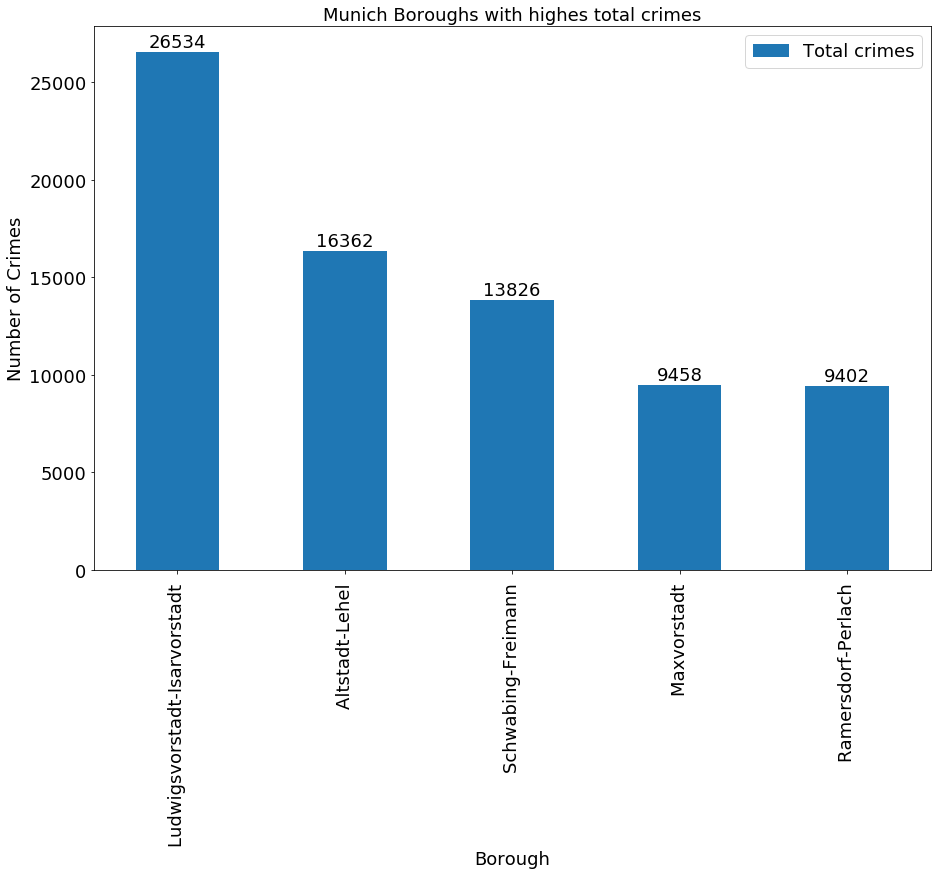

In [10]:
df_top = muc_crime_top5[['Borough','Total crimes']]

df_top.set_index('Borough',inplace = True)

ax = df_top.plot(kind='bar', figsize=(15, 10))

ax.set_ylabel('Number of Crimes', fontsize=18) # add to x-label to the plot
ax.set_xlabel('Borough', fontsize=18) # add y-label to the plot
ax.set_title('Munich Boroughs with highes total crimes', fontsize=18) # add title to the plot
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper right', prop={'size': 18})

# Creating a function to display total number of crimes.
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 18
               )

In [11]:
muc_crime.sort_values(['Total crimes'], ascending = True, axis = 0, inplace = True)
muc_crime_bottom5 = muc_crime.head()
muc_crime_bottom5

,Borough,Neighborhoods,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Total crimes,Latitude,Longitude
Borough Nr.,,,,,,,,,,,,,
23,Allach-Untermenzing,Allach | Untermenzing,1106,2,10,166,161,199,151,1100,2206,48.195994,11.457013
20,Hadern,Hadern,1556,1,20,233,345,270,212,1544,3100,48.118064,11.481842
22,Aubing-Lochhausen-Langwied,Aubing | Lochhausen | Langwied,1620,1,21,330,268,230,216,1604,3224,48.158437,11.414066
8,Schwanthalerhöhe,Schwanthalerhöhe,1703,2,13,275,257,244,243,1638,3341,48.133782,11.541057
18,Untergiesing-Harlaching,Untergiesing | Harlaching,1691,2,21,249,244,237,258,1677,3368,48.114963,11.570189


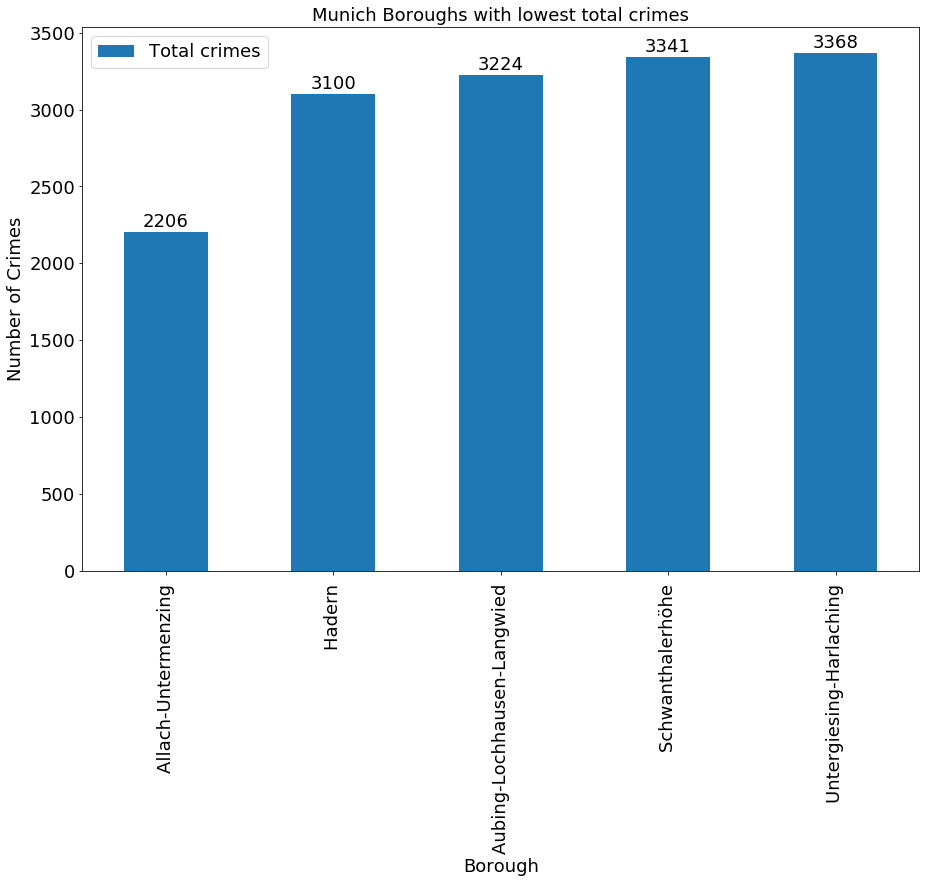

In [12]:
df_bottom = muc_crime_bottom5[['Borough','Total crimes']]

df_bottom.set_index('Borough',inplace = True)

ax = df_bottom.plot(kind='bar', figsize=(15, 10))

ax.set_ylabel('Number of Crimes', fontsize=18) # add to x-label to the plot
ax.set_xlabel('Borough', fontsize=18) # add y-label to the plot
ax.set_title('Munich Boroughs with lowest total crimes', fontsize=18) # add title to the plot
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper left', prop={'size': 18})

# Creating a function to display total number of crimes.
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 18
               )

#### Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = '2IL5H5ZWSYSKRCBHTQUZ302YBKXM10CEA21FU1IJBUMWAYCG' # your Foursquare ID
CLIENT_SECRET = '4W1EQKW1C02K0DHICC3HTAVC2T2ZHTASX2O152FTTJ3I010K' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2IL5H5ZWSYSKRCBHTQUZ302YBKXM10CEA21FU1IJBUMWAYCG
CLIENT_SECRET:4W1EQKW1C02K0DHICC3HTAVC2T2ZHTASX2O152FTTJ3I010K


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

Get the neighborhood's latitude and longitude values.

In [14]:
# Returns list of all tables on page
muc_housing_url='https://www.immobilienscout24.de/neubau/ratgeber/aktuelle-neubau-themen/neubau-kauf-map-wohnungen-muenchen-2019.html'
tables = pd.read_html(muc_housing_url, flavor='html5lib', header=0)
for table in tables:
    if 'Stadtteil' in table:
        muc_housing_nbh = table
        break
# Rename column headings to english
muc_housing_nbh.columns = ['Neighborhood', 'Price', 'Increase']
muc_housing_nbh['Price'] = muc_housing_nbh['Price'].map(lambda x: x.rstrip(' Euro'))
muc_housing_nbh['Price'] = muc_housing_nbh['Price'].astype(float) * 1000
muc_housing_nbh['Increase'] = muc_housing_nbh['Increase'].map(lambda x: x.rstrip('%'))
muc_housing_nbh['Increase'] = muc_housing_nbh['Increase'].str.replace(',', '.').astype(float)
muc_housing_nbh.index += 1
muc_housing_nbh.head()

,Neighborhood,Price,Increase
1,Maxvorstadt,13095.0,7.4
2,Lehel,12746.0,4.6
3,Schwabing-West,12923.0,7.5
4,Ludwigsvorstadt-Isarvorstadt,12207.0,6.7
5,Au,12165.0,7.3


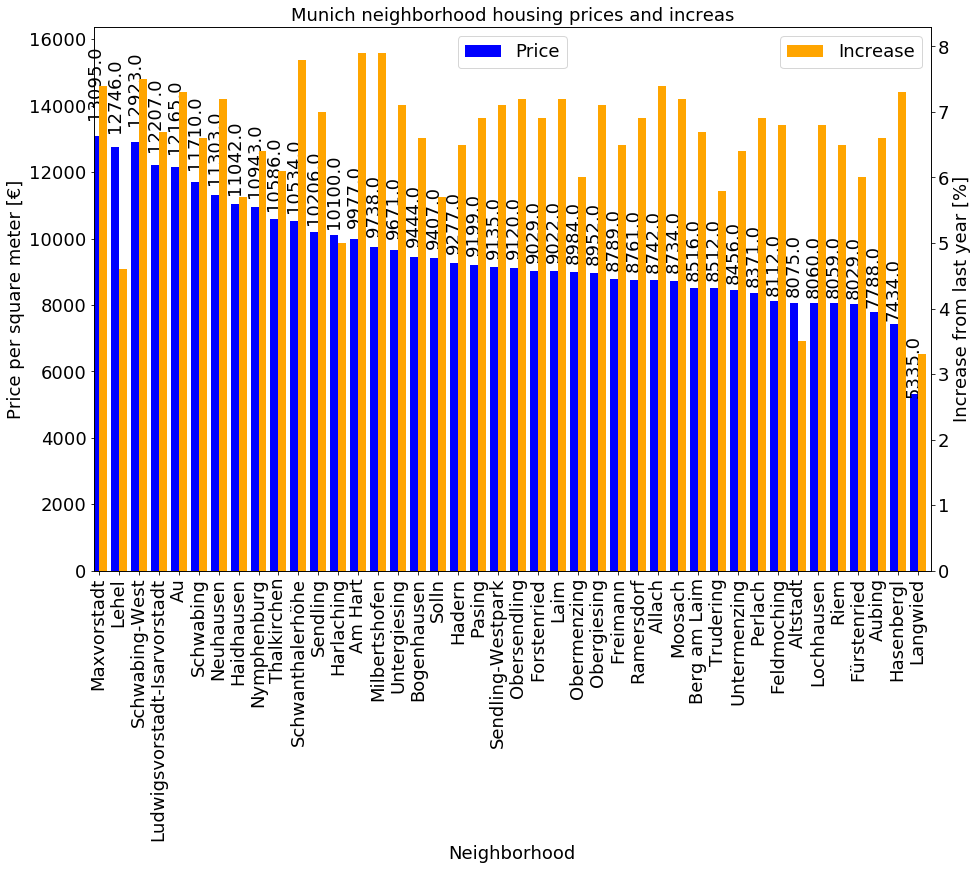

In [15]:
#ax = muc_housing_nbh.plot(kind='bar', figsize=(15, 10))
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

muc_housing_nbh.Price.plot(kind='bar', color='blue', ax=ax1, width=0.4, position=1)
muc_housing_nbh.Increase.plot(kind='bar', color='orange', ax=ax2, width=0.4, position=0)

ax1.set_title('Munich neighborhood housing prices and increas', fontsize=18) # add title to the plot
ax1.set_xlabel('Neighborhood', fontsize=18) 
ax1.set_xticklabels(muc_housing_nbh.Neighborhood)
ax1.set_ylabel('Price per square meter [€]', fontsize=18)
ax2.set_ylabel('Increase from last year [%]', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax1.set_ylim(0, muc_housing_nbh.Price.max()*1.25)
ax1.legend(loc='upper center', prop={'size': 18})
ax2.legend(loc='upper right', prop={'size': 18})

# Creating a function to display total number of crimes.
for p in ax1.patches:
    ax1.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()*1.1), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                rotation=90,
                fontsize = 18
               )

plt.show()

In [16]:
# Returns list of all tables on page
import requests
muc_nbh_brg_URL = requests.get('https://de.wikipedia.org/wiki/Liste_der_Stadtteile_Münchens').content
tables = pd.read_html(muc_nbh_brg_URL, flavor='html5lib', header=0, encoding='utf-8')
for table in tables:
    if 'Stadtteil' in table:
        muc_nbh_brg = table
        break
# Rename column headings to english
del muc_nbh_brg['Quartiere und Siedlungen im Stadtteil']
muc_nbh_brg.columns = ['Neighborhood', 'Borough', 'Borough Nr.',]
muc_nbh_brg.index += 1
muc_nbh_brg

,Neighborhood,Borough,Borough Nr.
1,Allach,Allach-Untermenzing,23
2,Altstadt,Altstadt-Lehel,1
3,Am Hart,Milbertshofen-Am Hart,11
4,Am Moosfeld,Trudering-Riem,15
5,Am Riesenfeld,Milbertshofen-Am Hart,11
6,Au,Au-Haidhausen,5
7,Aubing,Aubing-Lochhausen-Langwied,22
8,Berg am Laim,Berg am Laim,14
9,Bogenhausen,Bogenhausen,13
10,Daglfing,Bogenhausen,13


In [17]:
#muc_housing_brg = pd.DataFrame(muc_crime['Borough']).sort_index(0)
#muc_housing_brg['Prices'] = pd.Series(dtype=float, index=muc_housing_brg.index)
#muc_housing_brg.head()

In [18]:
# Returns list of all tables on page
muc_housing_nbh

,Neighborhood,Price,Increase
1,Maxvorstadt,13095.0,7.4
2,Lehel,12746.0,4.6
3,Schwabing-West,12923.0,7.5
4,Ludwigsvorstadt-Isarvorstadt,12207.0,6.7
5,Au,12165.0,7.3
6,Schwabing,11710.0,6.6
7,Neuhausen,11303.0,7.2
8,Haidhausen,11042.0,5.7
9,Nymphenburg,10943.0,6.4
10,Thalkirchen,10586.0,6.1


In [19]:
# Returns list of all tables on page
muc_housing_nbh_test = muc_housing_nbh
#muc_housing_nbh_test['Borough Nr.'] = pd.Series(dtype=float, index=muc_housing_brg.index)
muc_housing_nbh_test = muc_housing_nbh_test.merge(muc_nbh_brg[['Neighborhood', 'Borough Nr.']], on=['Neighborhood'])
muc_housing_nbh_test

,Neighborhood,Price,Increase,Borough Nr.
0,Maxvorstadt,13095.0,7.4,3
1,Lehel,12746.0,4.6,1
2,Au,12165.0,7.3,5
3,Neuhausen,11303.0,7.2,9
4,Haidhausen,11042.0,5.7,5
5,Nymphenburg,10943.0,6.4,9
6,Thalkirchen,10586.0,6.1,19
7,Schwanthalerhöhe,10534.0,7.8,8
8,Harlaching,10100.0,5.0,18
9,Am Hart,9977.0,7.9,11


In [20]:
# Returns list of all tables on page
muc_crime.sort_values(['Borough Nr.'], ascending = True, axis = 0, inplace = True)
muc_crime    

,Borough,Neighborhoods,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Total crimes,Latitude,Longitude
Borough Nr.,,,,,,,,,,,,,
1,Altstadt-Lehel,Altstadt | Lehel,8205,3,93,1115,2604,575,1346,8157,16362,48.137828,11.574582
2,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt | Isarvorstadt,14091,6,212,1887,2806,688,1571,12443,26534,48.131771,11.555809
3,Maxvorstadt,Maxvorstadt,4799,2,63,727,993,492,587,4659,9458,48.151092,11.562418
4,Schwabing-West,Schwabing-West,2310,3,40,281,397,466,334,2305,4615,48.168271,11.569873
5,Au-Haidhausen,Au | Haidhausen,3531,2,34,406,772,429,789,3469,7000,48.128753,11.590536
6,Sendling,Sendling,1983,2,22,274,270,325,338,1971,3954,48.118012,11.539083
7,Sendling-Westpark,Sendling-Westpark,2234,-,38,335,297,328,412,2215,4449,48.118031,11.519333
8,Schwanthalerhöhe,Schwanthalerhöhe,1703,2,13,275,257,244,243,1638,3341,48.133782,11.541057
9,Neuhausen-Nymphenburg,Neuhausen | Nymphenburg,3913,2,51,558,712,813,553,3815,7728,48.154222,11.531517


In [59]:
# Returns list of all tables on page

muc_crime.sort_values(['Borough Nr.'], ascending = True, axis = 0, inplace = True)

cr = muc_crime.copy()
cr['Price'] = ''
hp = muc_housing_nbh.copy()
nb = muc_nbh_brg.copy()


for i in range(1,15):
    test = cr.loc[cr.Neighborhoods == 'Laim', 'Price'].tolist()[0]
    #print(test)
    if not test:
        cr.loc[cr.Neighborhoods == 'Laim', 'Price'] =  i     
    else:
        cr.loc[cr.Neighborhoods == 'Laim', 'Price'] =  cr.loc[cr.Neighborhoods == 'Laim', 'Price'].tolist()[0] + 1

    test = cr.loc[cr.Neighborhoods == 'Laim', 'Price'].tolist()[0]
    print(test)

    


#cr.head


1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [86]:
# Returns list of all tables on page

muc_crime.sort_values(['Borough Nr.'], ascending = True, axis = 0, inplace = True)

cr = muc_crime.copy()
cr['Price'] = ''
hp = muc_housing_nbh.copy()
nb = muc_nbh_brg.copy()

prices_dict = {}



for i, n in enumerate(hp.Neighborhood):
    price = hp['Price'][i+1]    
    #print(n, price)
    test = cr.Borough.str.contains(n)
    #print(test)
    test_count = test.value_counts().tolist()
    if test_count[1] > 1:
        if n == 'Au':
            cr_index = 5
        elif n == 'Schwabing':
            cr_index = 12
        elif n == 'Sendling':
            cr_index = 6
        elif n == 'Laim':
            cr_index = 25
        #print(n, cr_index)
    else:
        #print(n, hp['Price'][hp.index[hp['Neighborhood'] == n].tolist()[0]])
        cr_index = cr.index[cr.Borough.str.contains(n) == True].tolist()[0] 
        #print(n, cr_index)    

    #print(n, cr_index)    

    if cr_index in prices_dict:
        prices_dict[cr_index] = prices_dict[cr_index] + price
    else:
        prices_dict[cr_index] = price

print(prices_dict)

for k, v in prices_dict.items():
    cr.loc[cr.index == k, 'Price'] = v

cr

{3: 13095.0, 1: 20821.0, 4: 12923.0, 2: 12207.0, 5: 23207.0, 12: 20499.0, 9: 22246.0, 19: 46171.0, 8: 10534.0, 6: 10206.0, 18: 19771.0, 11: 19715.0, 13: 9444.0, 20: 9277.0, 21: 18183.0, 7: 9135.0, 25: 9022.0, 17: 8952.0, 16: 17132.0, 23: 17198.0, 10: 8734.0, 14: 8516.0, 15: 16571.0, 24: 15546.0, 22: 21183.0}


,Borough,Neighborhoods,Number of neighborhoods,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Total crimes,Price
Borough Nr.,,,,,,,,,,,,,
1,Altstadt-Lehel,Altstadt | Lehel,2,8205,3,93,1115,2604,575,1346,8157,16362,20821
2,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt | Isarvorstadt,2,14091,6,212,1887,2806,688,1571,12443,26534,12207
3,Maxvorstadt,Maxvorstadt,1,4799,2,63,727,993,492,587,4659,9458,13095
4,Schwabing-West,Schwabing-West,1,2310,3,40,281,397,466,334,2305,4615,12923
5,Au-Haidhausen,Au | Haidhausen,2,3531,2,34,406,772,429,789,3469,7000,23207
6,Sendling,Sendling,1,1983,2,22,274,270,325,338,1971,3954,10206
7,Sendling-Westpark,Sendling-Westpark,1,2234,-,38,335,297,328,412,2215,4449,9135
8,Schwanthalerhöhe,Schwanthalerhöhe,1,1703,2,13,275,257,244,243,1638,3341,10534
9,Neuhausen-Nymphenburg,Neuhausen | Nymphenburg,2,3913,2,51,558,712,813,553,3815,7728,22246


In [87]:
cr['Price'] = cr['Price'] / cr['Number of neighborhoods']

cr

,Borough,Neighborhoods,Number of neighborhoods,Total major crimes,Crimes against life,Crimes against sexual self-determination,Criminal offence,Simple theft,Aggravated theft,Crimes against property,Total other crimes,Total crimes,Price
Borough Nr.,,,,,,,,,,,,,
1,Altstadt-Lehel,Altstadt | Lehel,2,8205,3,93,1115,2604,575,1346,8157,16362,10410.5
2,Ludwigsvorstadt-Isarvorstadt,Ludwigsvorstadt | Isarvorstadt,2,14091,6,212,1887,2806,688,1571,12443,26534,6103.5
3,Maxvorstadt,Maxvorstadt,1,4799,2,63,727,993,492,587,4659,9458,13095
4,Schwabing-West,Schwabing-West,1,2310,3,40,281,397,466,334,2305,4615,12923
5,Au-Haidhausen,Au | Haidhausen,2,3531,2,34,406,772,429,789,3469,7000,11603.5
6,Sendling,Sendling,1,1983,2,22,274,270,325,338,1971,3954,10206
7,Sendling-Westpark,Sendling-Westpark,1,2234,-,38,335,297,328,412,2215,4449,9135
8,Schwanthalerhöhe,Schwanthalerhöhe,1,1703,2,13,275,257,244,243,1638,3341,10534
9,Neuhausen-Nymphenburg,Neuhausen | Nymphenburg,2,3913,2,51,558,712,813,553,3815,7728,11123


In [81]:
# Returns list of all tables on page

muc_crime.sort_values(['Borough Nr.'], ascending = True, axis = 0, inplace = True)

cr = muc_crime.copy()
cr['Price'] = ''
hp = muc_housing_nbh.copy()
nb = muc_nbh_brg.copy()

prices_dict = {}



for i, n in enumerate(hp.Neighborhood):
    price = hp['Price'][i+1]    
    #print(n, price)
    test = cr.Borough.str.contains(n)
    #print(test)
    test_count = test.value_counts().tolist()
    if test_count[1] > 1:
        if n == 'Au':
            cr_index = 5
        elif n == 'Schwabing':
            cr_index = 12
        elif n == 'Sendling':
            cr_index = 6
        elif n == 'Laim':
            cr_index = 25
        #print(n, cr_index)
    else:
        #print(n, hp['Price'][hp.index[hp['Neighborhood'] == n].tolist()[0]])
        cr_index = cr.index[cr.Borough.str.contains(n) == True].tolist()[0] 
        #print(n, cr_index)    

    #print(n, cr_index)    

    if cr_index in prices_dict:
        prices_dict[cr_index] = prices_dict[cr_index] + price
    else:
        prices_dict[cr_index] = price

print(prices_dict)

for i, n in enumerate(cr.Borough):
    #print(i)    
    test = cr.loc[cr.index == i+1, 'Number of neighborhoods'].tolist()[0]
    print(test)
    prices_dict[cr_index] = prices_dict[cr_index] / cr.loc[cr.index == i+1, 'Number of neighborhoods'].tolist()[0]

print(prices_dict)


{3: 13095.0, 1: 20821.0, 4: 12923.0, 2: 12207.0, 5: 23207.0, 12: 20499.0, 9: 22246.0, 19: 46171.0, 8: 10534.0, 6: 10206.0, 18: 19771.0, 11: 19715.0, 13: 9444.0, 20: 9277.0, 21: 18183.0, 7: 9135.0, 25: 9022.0, 17: 8952.0, 16: 17132.0, 23: 17198.0, 10: 8734.0, 14: 8516.0, 15: 16571.0, 24: 15546.0, 22: 21183.0}
2
2
1
1
2
1
1
1
2
1
2
2
1
1
2
2
1
2
5
1
2
3
2
2
1
{3: 13095.0, 1: 20821.0, 4: 12923.0, 2: 12207.0, 5: 23207.0, 12: 20499.0, 9: 22246.0, 19: 46171.0, 8: 10534.0, 6: 10206.0, 18: 19771.0, 11: 19715.0, 13: 9444.0, 20: 9277.0, 21: 18183.0, 7: 9135.0, 25: 9022.0, 17: 8952.0, 16: 17132.0, 23: 17198.0, 10: 8734.0, 14: 8516.0, 15: 16571.0, 24: 15546.0, 22: 0.344775390625}


In [ ]:
# Returns list of all tables on page

muc_crime.sort_values(['Borough Nr.'], ascending = True, axis = 0, inplace = True)

cr = muc_crime.copy()
cr['Price'] = ''
hp = muc_housing_nbh.copy()
nb = muc_nbh_brg.copy()

for i, n in enumerate(hp.Neighborhood):
    price = hp['Price'][i+1]    
    #print(n, price)
    test = cr.Borough.str.contains(n)
    #print(test)
    test_count = test.value_counts().tolist()
    if test_count[1] > 1:
        if n == 'Au':
            cr_index = 5
        elif n == 'Schwabing':
            cr_index = 12
        elif n == 'Sendling':
            cr_index = 6
        elif n == 'Laim':
            cr_index = 25
        #print(n, cr_index)
    else:
        #print(n, hp['Price'][hp.index[hp['Neighborhood'] == n].tolist()[0]])
        cr_index = cr.index[cr.Borough.str.contains(n) == True].tolist()[0] 
        #print(n, cr_index)    

    print(n, cr_index)    
    #cr.at['Price', cr_index] = cr.at['Price', cr_index] + price
    test = cr.loc[cr.index == cr_index, 'Price'].tolist()[0]
    if not test:
        cr.loc[cr.index == cr_index, 'Price'] = price
    else:
        cr.loc[cr.index == cr_index, 'Price'] = cr.loc[cr.index == cr_index, 'Price'].tolist()[0] + price
    test = cr.loc[cr.index == cr_index, 'Price'].tolist()[0]
    print(test)
    
print('\n=========\n')
    
for i, n in enumerate(cr.Borough):
    print(i+1)
    cr.loc[cr.index == i+1, 'Price'] = cr.loc[cr.index == i+1, 'Price'].tolist()[0] / cr.loc[cr.index == i+1, 'Number of neighborhoods'].tolist()[0]
    test = cr.loc[cr.index == cr_index, 'Price'].tolist()[0]
    print(test)
        
cr

In [ ]:
# Returns list of all tables on page

cr = muc_crime.copy()
hp = muc_housing_nbh.copy()
nb = muc_nbh_brg.copy()

for i, n in enumerate(hp.Neighborhood):
    price = hp['Price'][i+1]    
    #print(n, price)
    test = cr.Borough.str.contains(n)
    test_count = test.value_counts()
    if test_count[1] > 1:
        if n == 'Au':
            print(n, hp['Price'][hp.iloc[i+1]])
        elif n == 'Schwabing':
            print(n, hp['Price'][hp.iloc[i+1]])
        elif n == 'Sendling':
            print(n, hp['Price'][hp.iloc[i+1]])
        elif n == 'Laim':
            print(n, hp['Price'][hp.iloc[i+1]])
    else:
        #print(n, hp['Price'][hp.index[hp['Neighborhood'] == n].tolist()[0]])

        
        #cr['Borough Nr.'][cr.index[cr['Borough'].str.contains(n)].tolist()[0]]
        
        print(test)
        index = np.where(test)[0]
        print(index[0])
                
        
        
    #print(test)
    

In [ ]:
# Returns list of all tables on page

cr = muc_crime.copy()
hp = muc_housing_nbh.copy()
nb = muc_nbh_brg.copy()

for i, n in enumerate(hp.Neighborhood):
    price = hp['Price'][i+1]    
    #print(n, price)
    test = cr.Borough.str.contains(n)
    test_count = test.value_counts()
    if test_count[1] > 1:
        if n == 'Au':
            print(n, hp['Price'][hp.iloc[i+1]])
        elif n == 'Schwabing':
            print(n, hp['Price'][hp.iloc[i+1]])
        elif n == 'Sendling':
            print(n, hp['Price'][hp.iloc[i+1]])
        elif n == 'Laim':
            print(n, hp['Price'][hp.iloc[i+1]])
    else:
        #print(n, hp['Price'][hp.index[hp['Neighborhood'] == n].tolist()[0]])

        
        #cr['Borough Nr.'][cr.index[cr['Borough'].str.contains(n)].tolist()[0]]
        
        print(test)
        index = np.where(test)[0]
        print(index[0])
        
        print(cr['Borough Nr.'][cr.index[index(0)]])
        
        
    #print(test)
    

In [ ]:
# Returns list of all tables on page

cr = muc_crime.copy()
hp = muc_housing_nbh.copy()
nb = muc_nbh_brg.copy()

#hp.sort_values(['Neighborhood'], ascending = True, axis = 0, inplace = True)
#nb.sort_values(['Neighborhood'], ascending = True, axis = 0, inplace = True)
#print(hp)
#print(nb)

for n in hp.Neighborhood:
    print(n)
    test = cr.Borough.str.contains(n)
    #print(hp[''])



    #test = nb[nb['Borough'] == borough]
    #print(test)
#borough = 'Allach-Untermenzing'

    #print(muc_nbh_brg[muc_nbh_brg.Borough == borough])


In [ ]:
# Returns list of all tables on page

cr = muc_crime.copy()
hp = muc_housing_nbh.copy()
nb = muc_nbh_brg.copy()

#hp.sort_values(['Neighborhood'], ascending = True, axis = 0, inplace = True)
#nb.sort_values(['Neighborhood'], ascending = True, axis = 0, inplace = True)
#print(hp)
#print(nb)

test = hp.merge(nb, on=['Neighborhood'], how='outer')
#test

import re

for borough in muc_crime.Borough:
    #print(borough)
    test = nb.Borough.str.contains(borough)
    #print(test)
        
for borough in muc_crime.Borough:
    booleans = []
    for b in nb.Borough:
        if re.search(b, borough):
            booleans.append(True)
        else:
            booleans.append(False)
    #print(booleans)
    
borough = 'Allach-Untermenzing'   
test = hp.Neighborhood.str.contains(borough)
#print(test)


for n in hp.Neighborhood:
    print(n)
    test = cr.Borough.str.contains(n)
    print(hp[''])



    #test = nb[nb['Borough'] == borough]
    #print(test)
#borough = 'Allach-Untermenzing'

    #print(muc_nbh_brg[muc_nbh_brg.Borough == borough])


In [ ]:
# Returns list of all tables on page

cr = muc_crime.copy()
hp = muc_housing_nbh.copy()
nb = muc_nbh_brg.copy()

#hp.sort_values(['Neighborhood'], ascending = True, axis = 0, inplace = True)
#nb.sort_values(['Neighborhood'], ascending = True, axis = 0, inplace = True)
#print(hp)
#print(nb)

test = hp.merge(nb, on=['Neighborhood'], how='outer')
#test

import re

for borough in muc_crime.Borough:
    booleans = []
    for b in nb.Borough:
        if re.search(b, borough):
            booleans.append(True)
        else:
            booleans.append(False)
    print(booleans)
            
    
    
    #test = nb[nb['Borough'] == borough]
    #print(test)
#borough = 'Allach-Untermenzing'

    #print(muc_nbh_brg[muc_nbh_brg.Borough == borough])


In [ ]:
# Returns list of all tables on page

cr = muc_crime.copy()
hp = muc_housing_nbh.copy()
nb = muc_nbh_brg.copy()

#hp.sort_values(['Neighborhood'], ascending = True, axis = 0, inplace = True)
#nb.sort_values(['Neighborhood'], ascending = True, axis = 0, inplace = True)
#print(hp)
#print(nb)

test = hp.merge(nb, on=['Neighborhood'], how='outer')
#test

import re

for borough in muc_crime.Borough:
    for b in nb.Borough:
        if re.search(b, borough):
            for n in hp.Neighborhood:
                if re.search(n, b):
                    print(n)
        
    
    
    #test = nb[nb['Borough'] == borough]
    #print(test)
#borough = 'Allach-Untermenzing'

    #print(muc_nbh_brg[muc_nbh_brg.Borough == borough])
